<h1>Circle Geometry Attempt in Cartesian Coordinates</h1>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.linalg import eig
import itertools

In [140]:
# Boundary Circle

# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 101)

# the radius of the circle

x_origin = 0
y_origin = 0

r_boundary = np.sqrt(0.6)

# Compute x and y: ALL of x and y are inside the boundary 
x_boundary = r_boundary*np.cos(theta)
y_boundary = r_boundary*np.sin(theta)

Nx_boundary = np.size(x_boundary)
Ny_boundary = np.size(y_boundary)


# Make x,y grid 
x_upper_lim = 1.0
x_lower_lim = -1.0

y_upper_lim = 1.0
y_lower_lim = -1.0

# Number of grid points

Nx = 60
Ny = 60

x = np.linspace(x_lower_lim,x_upper_lim,Nx) # Mesh
y = np.linspace(y_lower_lim,y_upper_lim,Ny)

dx = x[1] - x[0] # Mesh Size
dy = y[1] - y[0]

# Create Meshgrid: 

X, Y = np.meshgrid(x, y) # X is size x^2, Y is size y^2

# Define general r values from X and Y

r = np.sqrt((X - x_origin)**2 + (Y - y_origin)**2)

# Define grid points that are inside/outside the circle - returns boolean matrix 

outside = r > r_boundary

inside = r <= r_boundary

# Initialise matrices

N = Nx*Ny # no. of unknowns

M = np.zeros((N,N)) # N rows, N columns
M.astype(float)

# Boundaries 

# Points defined by X[outside], Y[outside]
# Using Dirichlet conditions where z = 0 outside the circle, our zeroes matrix already meets this condition

x_outside = X[outside]
y_outside = Y[outside]

# Interiors

x_inside = X[inside]
y_inside = Y[inside]

# Want to say:
# For the x_inside points and y_inside points of X and Y 


for i in range(0,Nx):
    for j in range(0,Ny):
        if inside[i][j] == True:
            n = i+j*Nx
            M[n,n] = -2*((1/(dx)**2) + (1/(dy)**2)) # Main diagonal
            M[n,n-1]=1/((dx)**2) # Off diagonal to the left ie. point i-1, j
            M[n,n+1]=1/((dx)**2) # Off diagonal to the right ie. point i+1, j
            M[n,n-Nx]=1/((dy)**2) # Far off diagonal to the left ie. point i, j-1
            M[n,n+Nx]=1/((dy)**2) # Far off diagonal to the left ie. point i, j+1
            
# Solve for z
alpha,z = eig(M)

alpha = np.real(alpha)
z = np.real(z)

print(np.size(z))

print('E-value:', alpha)

12960000
E-value: [-6952.70638849 -6913.17993299 -6919.50325433 ...     0.
     0.             0.        ]


In [183]:
z0 = np.reshape(z[:,24], (Nx,Ny))
print(np.size(z0))

3600


3600


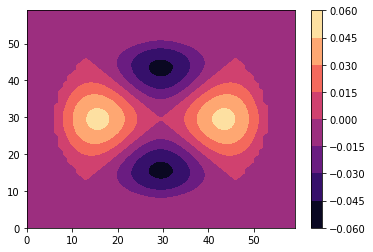

In [184]:
print(np.size(z0))
ax = plt.contourf(z0, cmap='magma')
cb = plt.colorbar(ax)

Text(0.5, 0.92, 'Circular 2-D Helmholtz')

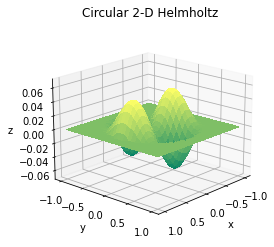

In [185]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, z0, cmap='summer', linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d((-0.075, 0.075))
ax.set_zlim3d((-0.07, 0.07))
ax.view_init(18, 42)
ax.set_title('Circular 2-D Helmholtz')

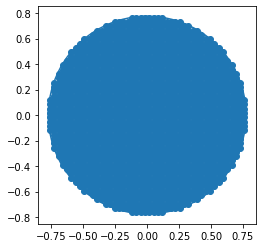

In [189]:
# create the figure
fig, ax = plt.subplots(1)
ax.plot(x_boundary, y_boundary)
ax.set_aspect(1)
# plt.plot(X, Y, marker='.', color='k', linestyle='none')
# ax.scatter(X[outside], Y[outside])
ax.scatter(X[inside], Y[inside])
plt.show()